# The dataset

We will explore regression models using a standard bencharking dataset, the AMES Housing data. This comprises data about individual housing property in AMES, Iowa, USA, from 2006-2010. More information on the data set can be found here: 
Dataset description -  http://jse.amstat.org/v19n3/decock.pdf
Dataset documentation http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
The actual dataset in text, tab-separated format: http://jse.amstat.org/v19n3/decock/AmesHousing.txt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

We will not use the complete set of attributes in the dataset but we will downselect specific ones: 

Overall Qual (Ordinal): Rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
Overall Cond (Ordinal): Rates the overall condition of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor 
       
Gr Liv Area (Continuous): Above grade (ground) living area square feet

entral Air (Nominal): Central air conditioning
       N	No
       Y	Yes

total Bsmt SF (Continuous): Total square feet of basement area

SalePrice (Continuous): Sale price in $$

In [2]:
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']

In [3]:
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',sep='\t',usecols=columns)

We can also read the data set locally

In [15]:
df = pd.read_csv('AmesHousing.txt',sep='\t',usecols=columns)

Let's inspect the first 5 lines of the dataframe populated with the data

In [4]:
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


All attributes above are numerical, apart from Central Air

Let's inspect also the shape / dimensions of the dataset

In [5]:
df.shape

(2930, 6)

We can convert the Central Air varariable to a numerical one by mapping 'N' values to 0 and 'Y' values to 1 and inspect the data again.

In [6]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [19]:
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


Before progressing any further, let's check for missing values using the isnull() method of the dataframe

In [7]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

We have counted '1' missing value in the Total Bsmt SF attribute. As this is in just one record, the simplest approach without sacrificing much information from the dataset is to remove this record. We will use a method which drops "non a number" records. 

In [8]:
df = df.dropna(axis=0)

In [9]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

Good - no missing values any more

# Applying Polynomial Regression

Next, we keep Gr Liv Area as the input attribute for the linear regression. The output attribute is the SalePrice. 

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import numpy as np

In [11]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

We will remove three outliers with livng area grater than 4000 square feet

In [12]:
X = X[(df['Gr Liv Area'] < 4000)]
y = y[(df['Gr Liv Area'] < 4000)]

The regression models are built next

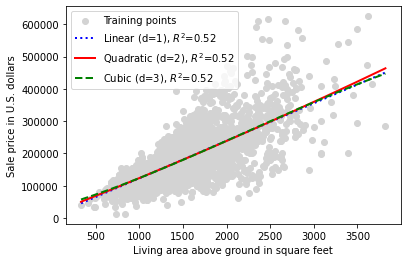

In [13]:
regr = LinearRegression()
# create quadratic and cubic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)
# fit to features
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))
# plot results
plt.scatter(X, y, label='Training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, 
              label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
              color='blue', 
              lw=2, 
              linestyle=':')
plt.plot(X_fit, y_quad_fit, 
              label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',
              color='red', 
              lw=2,
              linestyle='-')
plt.plot(X_fit, y_cubic_fit, 
              label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
              color='green', 
              lw=2,
              linestyle='--')
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')
plt.show()

No improvement is observed using the polynomial regression of quadratic or cubic order. Let's consider another attribute, Overall Qual. This is an ordinal variable, given on a scale of 1 to 10 (10 denotes best quality). 

In [14]:
X = df[['Overall Qual']].values
y = df['SalePrice'].values

The regression models are built next

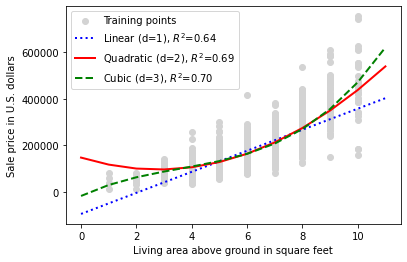

In [15]:
regr = LinearRegression()
# create quadratic and cubic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)
# fit to features
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))
# plot results
plt.scatter(X, y, label='Training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, 
              label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
              color='blue', 
              lw=2, 
              linestyle=':')
plt.plot(X_fit, y_quad_fit, 
              label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',
              color='red', 
              lw=2,
              linestyle='-')
plt.plot(X_fit, y_cubic_fit, 
              label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
              color='green', 
              lw=2,
              linestyle='--')
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')
plt.show()

Now the polynomial fit is somewhat better thatn the linear. But avoid increasing the order of the polynomial if it does not lead to tangible improvements. In this case the benefit of the cubic fit is very marginal over the quadratic. Remembering Occan's razor, we would choose hte quadratic. 